# Revisão Classificação vs Regressão

- https://in.springboard.com/blog/regression-vs-classification-in-machine-learning/



## Quiz: Classificação ou Regressão?
1 - Previsão do tempo de 25°C - regressão

2 - Previsão do tempo se vai ser quente, frio,... - classificação

3 - Detecção de Spam - classificação

4 - Preço de um imóvel - regressão

5 - Espécie de uma flor baseado em suas medidas - classificação

6 - Diabetes com base no histórico médico - classificação

7 - Ano que uma música foi criada baseado em [atributos extraídos da própria música](http://millionsongdataset.com/) - classificação

8 - [Fotos de dígitos escritos à mão](https://en.wikipedia.org/wiki/MNIST_database) - classificação

# Intuições dos principais estimadores

Visualização dos pesos: https://www.desmos.com/calculator/111bwdmrog



## Regressão Linear
![](https://sebastianraschka.com/images/faq/closed-form-vs-gd/simple_regression.png)


## Regressão Logística
![LogReg_1.png](http://www.saedsayad.com/images/LogReg_1.png)

- Visualização dos pesos: https://www.desmos.com/calculator/gcswlgxy83


## Redes Neurais
![](https://www.researchgate.net/profile/Sandra_Vieira5/publication/312205163/figure/fig1/AS:453658144972800@1485171938968/a-The-building-block-of-deep-neural-networks-artificial-neuron-or-node-Each-input-x.png)

## Support Vector Machine
O seguinte gif resume o funcionamento de SVM através do uso de margens e *support vectors*:

![svm_solve_by_hand-e1496076457793.gif](https://udacity-reviews-uploads.s3.us-west-2.amazonaws.com/_attachments/38140/1514144432/svm_solve_by_hand-e1496076457793.gif)

Kernel trick:

![rotate.gif](http://blog.pluskid.org/wp-content/uploads/2010/09/rotate.gif)

# Aprofundando em Árvores de Decisão e Random Forest

Iremos fazer um tour em cima dos principais estimadores de classificação do Sklearn. O principal propósito é te dar um pouco de intuição em cima de como funcionam esses estimadores, seus pontos fortes e fracos. Criar essa intuição é importante, uma vez que em termos práticos, a implementação deles é bastante análoga. Por exemplo, no código a seguir estou treinando uma rede neural, um kNN e uma árvore de decisão para prever câncer de mama:

In [ ]:
#from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Carregar dados
data = load_breast_cancer()

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(data.data, 
                                                    data.target, 
                                                    random_state=42)

In [ ]:
# Treinar árvore de decisão
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train) 
score = clf.score(X_test, y_test)
print(f'Pontuação de teste para {clf.__class__.__name__} é {score*100:.2f}%')

# Treinar kNN
clf = KNeighborsClassifier()
clf.fit(X_train, y_train) 
score = clf.score(X_test, y_test)
print(f'Pontuação de teste para {clf.__class__.__name__} é {score*100:.2f}%')

# Treinar Rede Neural
clf = MLPClassifier()
clf.fit(X_train, y_train) 
score = clf.score(X_test, y_test)
print(f'Pontuação de teste para {clf.__class__.__name__} é {score*100:.2f}%')

Pontuação de teste para DecisionTreeClassifier é 95.10%
Pontuação de teste para KNeighborsClassifier é 96.50%
Pontuação de teste para MLPClassifier é 96.50%


Podemos perceber que treinamentos de estimadores sempre seguem o mesmo padrão, primeiro você inicializa ele em `clf = NomeEstimador()`, depois você treina ele em `clf.fit(entrada_treino, saida_treino)` e depois você avalia ele em `clf.score(entrada_teste, saida_teste)`. No entanto, o que estamos fazendo ali é tratando cada estimador como se fosse uma caixa preta, o que não são boas práticas. Em especial cada estimador possui parâmetros de entrada que podem influenciar em seu resultado, tomamos a árvore de decisão como exemplo:

In [ ]:
clf = DecisionTreeClassifier(max_depth=6)
clf.fit(X_train, y_train) 
score = clf.score(X_test, y_test)
print(f'Pontuação de teste para {clf.__class__.__name__} é {score*100:.2f}%')

Pontuação de teste para DecisionTreeClassifier é 93.01%


In [ ]:
lista_max_depths = [None, 1, 2, 3, 4, 5, 6, 7]

for profundidade in lista_max_depths:
    clf = DecisionTreeClassifier(max_depth=profundidade)
    clf.fit(X_train, y_train) 
    train_score = clf.score(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(f'Pontuação de treino para {clf.__class__.__name__} quando treinada com profundidade {profundidade} é {train_score*100:.2f}%')
    print(f'Pontuação de teste para {clf.__class__.__name__} quando treinada com profundidade {profundidade} é {score*100:.2f}%')
    print('='*80)

Pontuação de treino para DecisionTreeClassifier quando treinada com profundidade None é 100.00%
Pontuação de teste para DecisionTreeClassifier quando treinada com profundidade None é 95.10%
Pontuação de treino para DecisionTreeClassifier quando treinada com profundidade 1 é 92.25%
Pontuação de teste para DecisionTreeClassifier quando treinada com profundidade 1 é 89.51%
Pontuação de treino para DecisionTreeClassifier quando treinada com profundidade 2 é 94.60%
Pontuação de teste para DecisionTreeClassifier quando treinada com profundidade 2 é 91.61%
Pontuação de treino para DecisionTreeClassifier quando treinada com profundidade 3 é 97.18%
Pontuação de teste para DecisionTreeClassifier quando treinada com profundidade 3 é 95.10%
Pontuação de treino para DecisionTreeClassifier quando treinada com profundidade 4 é 99.53%
Pontuação de teste para DecisionTreeClassifier quando treinada com profundidade 4 é 95.10%
Pontuação de treino para DecisionTreeClassifier quando treinada com profundida

In [ ]:
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Portanto temos que o ajuste de seus parâmetros de inicialização pode influenciar no desempenho do modelo. Outra coisa que não sabemos quando implementamos os modelos como caixa pretas são seus pontos fortes e fracos. Em especial esse ponto é um dos mais importantes, pois sabendo disso já conseguiremos fazer uma pré-triagem de quais modelos testar. Portanto nosso objetivo aqui é fazer um tour em cima dos principais estimadores do sklearn, como eles são construídos e quais são seus principais parâmetros à serem calibrados.

### 1. Importanto base de dados e análise exploratória
Antes de começar vamos importar e dar uma olhada na base de dados que utilizaremos:

In [ ]:
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [ ]:
titanic = titanic.drop('alive', axis=1)

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,True


In [ ]:
# Divisão treino/teste
X = titanic.drop('survived', axis=1)
X = pd.get_dummies(X)

y = titanic['survived']

In [ ]:
X

,pclass,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third,who_child,who_man,who_woman,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,3,22.0,1,0,7.2500,True,False,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
1,1,38.0,1,0,71.2833,False,False,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
2,3,26.0,0,0,7.9250,False,True,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
3,1,35.0,1,0,53.1000,False,False,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
4,3,35.0,0,0,8.0500,True,True,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,True,True,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
887,1,19.0,0,0,30.0000,False,True,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
888,3,NaN,1,2,23.4500,False,False,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
889,1,26.0,0,0,30.0000,True,True,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pclass                   891 non-null    int64  
 1   age                      714 non-null    float64
 2   sibsp                    891 non-null    int64  
 3   parch                    891 non-null    int64  
 4   fare                     891 non-null    float64
 5   adult_male               891 non-null    bool   
 6   alone                    891 non-null    bool   
 7   sex_female               891 non-null    uint8  
 8   sex_male                 891 non-null    uint8  
 9   embarked_C               891 non-null    uint8  
 10  embarked_Q               891 non-null    uint8  
 11  embarked_S               891 non-null    uint8  
 12  class_First              891 non-null    uint8  
 13  class_Second             891 non-null    uint8  
 14  class_Third              8

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42)

In [ ]:
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_train.median())

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 298 to 102
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pclass                   668 non-null    int64  
 1   age                      668 non-null    float64
 2   sibsp                    668 non-null    int64  
 3   parch                    668 non-null    int64  
 4   fare                     668 non-null    float64
 5   adult_male               668 non-null    bool   
 6   alone                    668 non-null    bool   
 7   sex_female               668 non-null    uint8  
 8   sex_male                 668 non-null    uint8  
 9   embarked_C               668 non-null    uint8  
 10  embarked_Q               668 non-null    uint8  
 11  embarked_S               668 non-null    uint8  
 12  class_First              668 non-null    uint8  
 13  class_Second             668 non-null    uint8  
 14  class_Third             

## Algoritmos baseados em árvores

### Árvore de Decisão

For example, you can use this image to illustrate a decision tree:
- http://www.r2d3.us/uma-introducao-visual-ao-aprendizado-de-maquina-1/

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Treinar árvore de decisão
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train) 

score = clf.score(X_test, y_test)
print(f'Pontuação de teste para {clf.__class__.__name__} é {score*100:.2f}%')

Pontuação de teste para DecisionTreeClassifier é 74.89%


In [ ]:
from sklearn.tree import plot_tree

In [ ]:
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

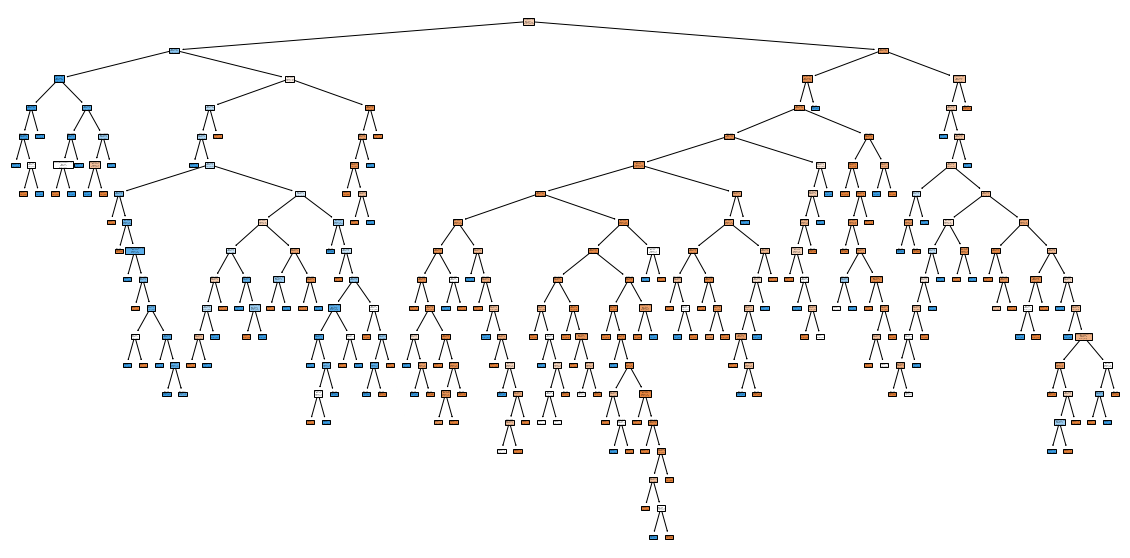

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
annotations = plot_tree(clf, feature_names=X_train.columns, filled=True)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Treinar árvore de decisão
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train) 

score = clf.score(X_test, y_test)
print(f'Pontuação de teste para {clf.__class__.__name__} é {score*100:.2f}%')

Pontuação de teste para DecisionTreeClassifier é 81.17%


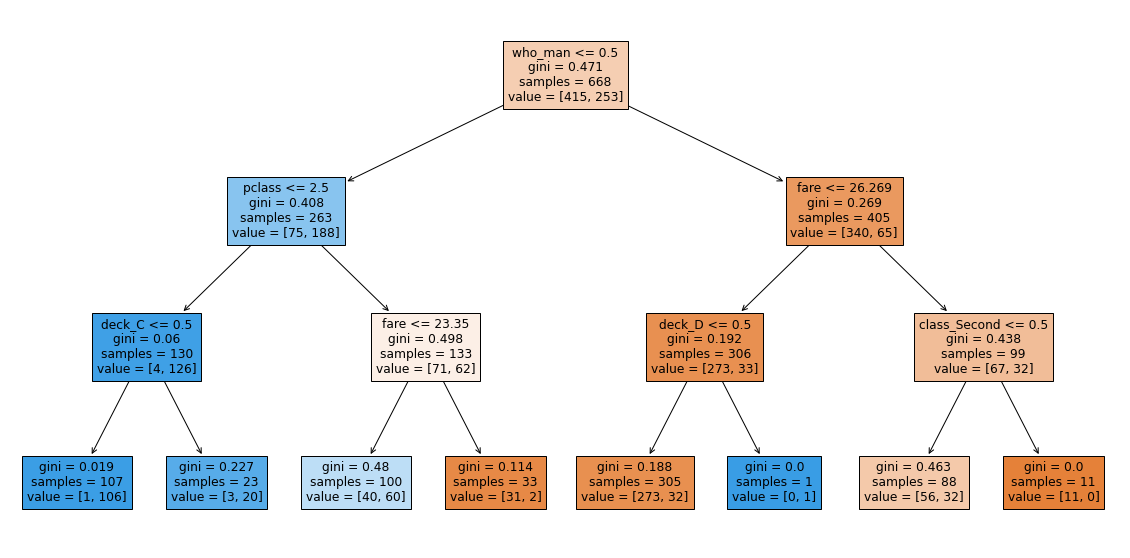

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))

annotations = plot_tree(clf, feature_names=X_train.columns,
                        filled=True)

In [ ]:
X_train.head()

,pclass,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third,who_child,who_man,who_woman,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
298,1,28.00,0,0,30.5000,True,True,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
884,3,25.00,0,0,7.0500,True,True,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
247,2,24.00,0,2,14.5000,False,False,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
478,3,22.00,0,0,7.5208,True,True,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
305,1,0.92,1,2,151.5500,False,False,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
clf.feature_importances_

array([0.21142086, 0.        , 0.        , 0.        , 0.13583183,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01642989, 0.        ,
       0.        , 0.62264255, 0.        , 0.        , 0.        ,
       0.00352726, 0.01014761, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [ ]:
X_train.columns.values

array(['pclass', 'age', 'sibsp', 'parch', 'fare', 'adult_male', 'alone',
       'sex_female', 'sex_male', 'embarked_C', 'embarked_Q', 'embarked_S',
       'class_First', 'class_Second', 'class_Third', 'who_child',
       'who_man', 'who_woman', 'deck_A', 'deck_B', 'deck_C', 'deck_D',
       'deck_E', 'deck_F', 'deck_G', 'embark_town_Cherbourg',
       'embark_town_Queenstown', 'embark_town_Southampton'], dtype=object)

In [ ]:
for i in zip(X_train.columns.values, clf.feature_importances_):
  print(i)
  print('----')

('pclass', 0.21142086338969723)
----
('age', 0.0)
----
('sibsp', 0.0)
----
('parch', 0.0)
----
('fare', 0.13583182963064072)
----
('adult_male', 0.0)
----
('alone', 0.0)
----
('sex_female', 0.0)
----
('sex_male', 0.0)
----
('embarked_C', 0.0)
----
('embarked_Q', 0.0)
----
('embarked_S', 0.0)
----
('class_First', 0.0)
----
('class_Second', 0.016429886080910512)
----
('class_Third', 0.0)
----
('who_child', 0.0)
----
('who_man', 0.6226425511084173)
----
('who_woman', 0.0)
----
('deck_A', 0.0)
----
('deck_B', 0.0)
----
('deck_C', 0.0035272589108698562)
----
('deck_D', 0.010147610879464378)
----
('deck_E', 0.0)
----
('deck_F', 0.0)
----
('deck_G', 0.0)
----
('embark_town_Cherbourg', 0.0)
----
('embark_town_Queenstown', 0.0)
----
('embark_town_Southampton', 0.0)
----


## Entendendo Random Forest


![1_i0o8mjFfCn-uD79-F1Cqkw.png](https://udacity-reviews-uploads.s3.us-west-2.amazonaws.com/_attachments/38140/1532554113/1_i0o8mjFfCn-uD79-F1Cqkw.png)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=3, max_depth=2) # hiperparâmetros
clf.fit(X_train, y_train) 
score = clf.score(X_test, y_test)
print(f'Pontuação de teste para {clf.__class__.__name__} é {score*100:.2f}%')

Pontuação de teste para RandomForestClassifier é 79.37%


In [ ]:
clf.estimators_

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=2, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=817981351, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=2, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=660749623, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=2, max_feature

In [ ]:
for indice, arvore in enumerate(clf.estimators_):
  print(indice, arvore)

0 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=817981351, splitter='best')
1 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=660749623, splitter='best')
2 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', 

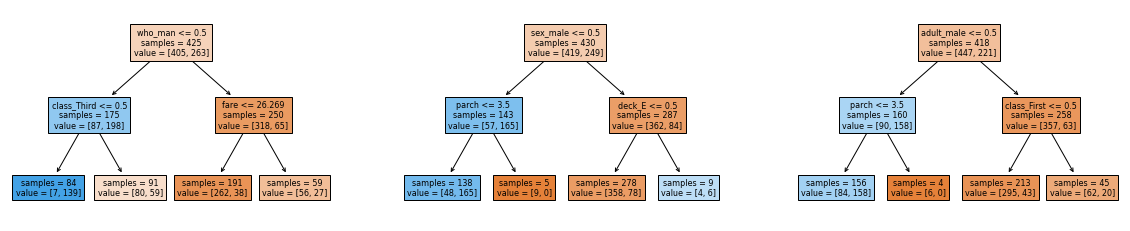

In [ ]:
plt.figure(figsize=(20, 4))

for indice, arvore in enumerate(clf.estimators_):
    plt.subplot(1, 3, indice+1)    
    _ = plot_tree(arvore, feature_names=X_train.columns, impurity=False, filled=True)
    

In [ ]:
#plot_tree?

In [ ]:
#RandomForestClassifier?

In [ ]:
# constantes são declaradas com uppercase e geralmente ficam no início do código
N_ESTIMATORS=5
MAX_DEPTH=2
N_FEATURES = len(X_train.columns)
MAX_FEATURES = int(N_FEATURES**0.5) #sqrt(n_features)

In [ ]:
estimators_ = []
features_ = []

for i in range(N_ESTIMATORS):
    X_sampled = X_train.sample(MAX_FEATURES, axis=1)
    X_sampled = X_sampled.sample(len(X_sampled), replace=True)
    y_sampled = y_train[X_sampled.index]

    clf = DecisionTreeClassifier(max_depth=MAX_DEPTH)
    clf.fit(X_sampled, y_sampled) 
    
    estimators_.append(clf)
    features_.append(X_sampled.columns)

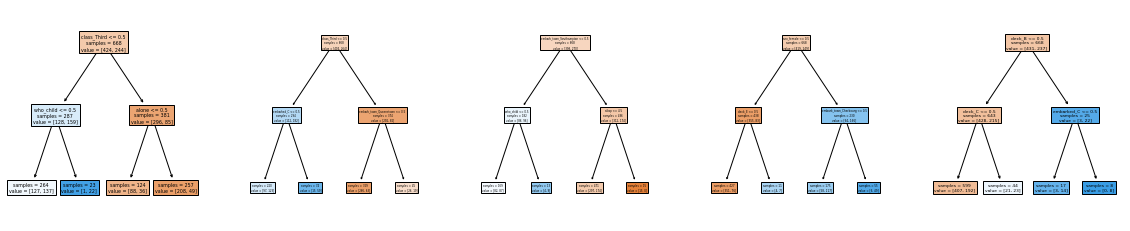

In [ ]:
plt.figure(figsize=(20, 4))

for i, c in enumerate(estimators_):
    plt.subplot(1, 5, i+1)    
    annotations = plot_tree(c, feature_names=features_[i],
                            impurity=False,
                            filled=True)

## Usando GridSearchCV

In [ ]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# busca de hiperparâmetros com o Grid Search - CV - cross validation
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[1, 3, 6], 'max_depth':[3, 5, 10]}

rf = RandomForestClassifier()

clf = GridSearchCV(rf, parameters)

clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [ ]:
clf.best_params_

{'max_depth': 10, 'n_estimators': 6}

In [ ]:
clf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=6,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# usando verbose para ver o que está acontecendo em cada fold por debaixo dos panos
clf = GridSearchCV(rf, parameters, verbose=1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.5s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [ ]:
# usando retornando o score de treinamento para o cv_results
clf = GridSearchCV(rf, parameters, verbose=1, return_train_score=True)
clf.fit(X_train, y_train)
print(clf.cv_results_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'mean_fit_time': array([0.00600977, 0.00715923, 0.01087427, 0.00475297, 0.0071023 ,
       0.0112144 , 0.00461216, 0.00738287, 0.01175594]), 'std_fit_time': array([2.10482084e-03, 4.19297503e-04, 2.12490376e-04, 4.87894496e-04,
       8.06668959e-05, 2.29802347e-04, 1.87864969e-04, 6.94758449e-05,
       1.31682620e-04]), 'mean_score_time': array([0.00253072, 0.00168686, 0.00215549, 0.00167866, 0.00167251,
       0.00207224, 0.00149288, 0.00170827, 0.00206685]), 'std_score_time': array([1.97754993e-03, 8.42011794e-05, 2.47152634e-04, 4.70089409e-04,
       3.01359575e-05, 8.59017343e-05, 4.48309607e-05, 4.13255814e-05,
       2.47266620e-05]), 'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 10, 10, 10],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[1, 3, 6, 1, 3, 6, 1, 3, 6],
             mask=[False, False, False, False, False, Fal

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.6s finished


## Random forest, AdaBoost e XGBoost

![boosting.png](https://udacity-github-sync-content.s3.amazonaws.com/_attachments/38140/1486523094/boosting.png)
